<a href="https://colab.research.google.com/github/hyo250/gittest/blob/master/diabetes_set(%EB%8B%B9%EB%87%A8%EB%B3%91_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**당뇨병 데이터 셋**

In [3]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(type(diabetes))
print(list(diabetes))

<class 'sklearn.utils.Bunch'>
['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename']


In [5]:
diabetes.feature_names #x 변수 확인. diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [10]:
diabetes.target #y변수 확인. 당뇨 지수.

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
print(np.shape(diabetes.data))
print(np.shape(diabetes.target))

(442, 10)
(442,)


In [22]:
df0=pd.DataFrame(diabetes.data, columns=list(diabetes.feature_names))
df=pd.DataFrame(diabetes.target)

df.to_csv('data/target.csv', index=False)
df0.to_csv('data/diabetes_data.csv', index=False)

In [ ]:
diabetes.feature_names #x 변수 확인. diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
diabetes.feature_names #x 변수 확인. diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [23]:
df1=pd.read_csv('data/target.csv')
df0=pd.read_csv('data/diabetes_data.csv')
print(df1.head())
print(df0.head())

       0
0  151.0
1   75.0
2  141.0
3  206.0
4  135.0
        age       sex       bmi  ...        s4        s5        s6
0  0.038076  0.050680  0.061696  ... -0.002592  0.019908 -0.017646
1 -0.001882 -0.044642 -0.051474  ... -0.039493 -0.068330 -0.092204
2  0.085299  0.050680  0.044451  ... -0.002592  0.002864 -0.025930
3 -0.089063 -0.044642 -0.011595  ...  0.034309  0.022692 -0.009362
4  0.005383 -0.044642 -0.036385  ... -0.002592 -0.031991 -0.046641

[5 rows x 10 columns]


In [29]:
dia_df=pd.concat((df0, df1), axis=1)
dia_df.head()
dia_df.to_csv('data/diabetes.csv')

In [32]:
dia_df.rename(columns={'0':'당뇨지수'}, inplace=True)
dia_df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,당뇨지수
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [33]:
dia_df.shape

(442, 11)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr=LinearRegression()
x=dia_df['bmi'].values.reshape(-1,1)
y=dia_df['당뇨지수'].values.reshape(-1,1)

X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=100)

In [43]:
X_train.shape

(309, 1)

In [51]:
model=lr.fit(X_train, y_train)
pred=model.predict(X_test)
pred.shape

(133, 1)

In [52]:
y_test.shape

(133, 1)

In [55]:
print(model.coef_) #회귀분석에서 기울기
print(model.intercept_) #절편

[[967.87658949]]
[154.23494335]


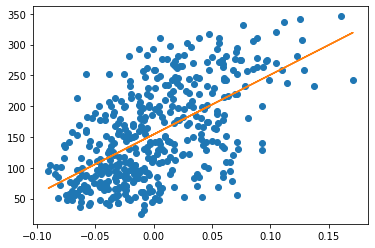

In [57]:
plt.plot(x, y, 'o')
plt.plot(x,model.predict(x.reshape(-1,1)))
plt.show()

**분류와 예측에서 정확도를 평가하는 지표는 다음과 같음 **

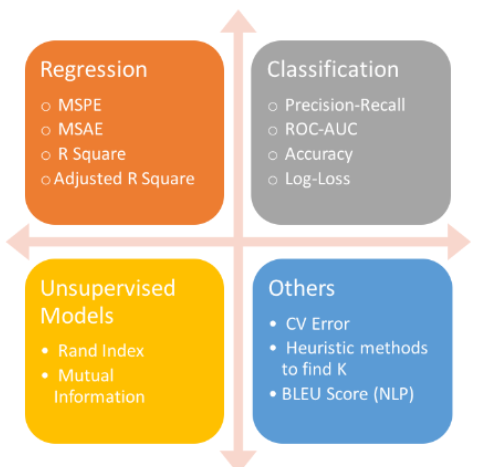

In [61]:
#회귀분석에서는 이런것으로 정확도를 평가합니다~ 오차가 최소화가 될것!!!

from sklearn.metrics import mean_absolute_error
MSE=mean_absolute_error(y_test, pred)
RMSE=np.sqrt(MSE)
print(MSE);print(RMSE)

48.15683861520791
6.939512851433299
